In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from Functions.air_distance import haversine

In [2]:
df = pd.read_csv('Data/CombinedData.csv',encoding='utf-8',low_memory=False)

In [5]:
df.columns

Index(['link', 'category', 'category_from_list', 'title', 'address', 'price',
       'agency', 'longtitude', 'latitude', 'area', 'landarea', 'purpose',
       'buildingtype', 'elevator', 'floorcount', 'roomcount', 'bathroomcount',
       'newbuilded', 'furniture', 'garagecount', 'repairstatus', 'balcony',
       'guests', 'domophone', 'doorman', 'playground', 'coveredparking',
       'outdoorparking', 'garage_tr_fl', 'househas', 'childer', 'animal',
       'utilitypayment', 'prepayment', 'description'],
      dtype='object')

In [6]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.tail(10)

,link,category,category_from_list,title,address,price,agency,longtitude,latitude,area,...,playground,coveredparking,outdoorparking,garage_tr_fl,househas,childer,animal,utilitypayment,prepayment,description
104326,https://www.list.am/item/20545124,sale,tnak-krpak-sale,"Տնակ, կրպակ 27քմ","Արարատի խճուղի, Նոյակերտ",3550.0,False,44.660879,39.829967,27.0,...,False,False,False,False,[],NaN,NaN,NaN,NaN,"Վաճառվում է կրպակ, 27քմ, մանրամասների համար զա..."
104327,https://www.list.am/item/20684739,sale,tnak-krpak-sale,Դոմիկ 9 մետրանոց,Արմավիր › Արմավիր,2250.0,False,44.038848,40.155553,9.0,...,False,False,False,False,[],NaN,NaN,NaN,NaN,Վաճառվում է դոմիկ 9 մետրանոց հարցերի համար զան...
104328,https://www.list.am/item/19283954,sale,tnak-krpak-sale,Մետաղյա տնակ Ծաղկաձորում 9մx3մ չափսերով,Կոտայք › Ծաղկաձոր,3750.0,False,44.715976,40.531743,27.0,...,False,False,False,False,[],NaN,NaN,NaN,NaN,"Մետաղյա տնակ Ծաղկաձորում, 9մx3մ չափսերով։ Արտա..."
104329,https://www.list.am/item/20546243,sale,tnak-krpak-sale,Եվրո լուսամուտներով կրպակ,"Խրիմյան Հայրիկ, Գյումրի",4200.0,False,43.851323,40.793035,25.0,...,False,False,False,False,[],NaN,NaN,NaN,NaN,Վաճառվում է միայն տաղավարը. Առանց տարացքի.Որը ...
104330,https://www.list.am/item/20668032,sale,tnak-krpak-sale,Harmaravet ecco tnak,Արմավիր › Պտղունք,6000.0,False,44.363645,40.165428,15.0,...,False,False,False,False,[],NaN,NaN,NaN,NaN,"Շատ հարմարավետ մաքուր տնակ, նոր կառուցված, ուն..."
104331,https://www.list.am/item/19600213,sale,tnak-krpak-sale,Տնակ դոմիկ վագոն,Գեղարքունիք › Ճամբարակ,2500.0,False,45.352940,40.599098,28.0,...,False,False,False,False,[],NaN,NaN,NaN,NaN,Վաճառվում է 8մ × 3.5մ չափսով գերազանց վիճակում...
104332,https://www.list.am/item/18408319,sale,tnak-krpak-sale,Տնակ դոմիկ,Երևան › Մալաթիա Սեբաստիա,1000.0,False,44.457492,40.168645,NaN,...,False,False,False,False,[],NaN,NaN,NaN,NaN,Երկաթյա. Գտնվոմ է նորմալ վիճակում. Չապսը 4 - 2...
104333,https://www.list.am/item/20266788,sale,tnak-krpak-sale,Տնակ domik домик,Կոտայք › Ծաղկաձոր,5750.0,False,44.715976,40.531743,24.0,...,False,False,False,False,[],NaN,NaN,NaN,NaN,Ջերմամեկուսացում3.60m. X 6.60m.
104334,https://www.list.am/item/20098393,sale,tnak-krpak-sale,Դոմիկ տնակ бутка,"8-րդ փողոց 1, Մայակովսկի",4000.0,False,44.642838,40.249527,27.0,...,False,False,False,False,[],NaN,NaN,NaN,NaN,Դոմիկ տնակ նոր վերանորոգած չբնակեցված մանրամաս...
104335,https://www.list.am/item/20387873,sale,tnak-krpak-sale,Դոմիկ երկաթե տնակ,Կոտայք › Նոր Արտամետ,2500.0,False,44.557886,40.300608,27.0,...,False,False,False,False,[],NaN,NaN,NaN,NaN,Վաճառվում է դոմիկ 9 մ երկրությամբ 3 մ լայնությ...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104336 entries, 0 to 104335
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   link                104336 non-null  object 
 1   category            104336 non-null  object 
 2   category_from_list  104336 non-null  object 
 3   title               104336 non-null  object 
 4   address             104177 non-null  object 
 5   price               98247 non-null   float64
 6   agency              104336 non-null  bool   
 7   longtitude          104336 non-null  float64
 8   latitude            104336 non-null  float64
 9   area                89936 non-null   float64
 10  landarea            36979 non-null   float64
 11  purpose             51567 non-null   object 
 12  buildingtype        80115 non-null   object 
 13  elevator            64084 non-null   object 
 14  floorcount          75991 non-null   float64
 15  roomcount           75283 non-null

In [20]:
df['category_from_list'].unique()

array(['apartments-long_term-rent', 'apartments-sale',
       'commercial-estate-offices-rent', 'commercial-estate-sale',
       'daily-apartments-rent', 'daily-house-rent', 'event-venues',
       'garages-parking-slots-rent', 'garages-parking-slots-sale',
       'houses-rent', 'houses-sale', 'land-rent', 'land-sale',
       'new-apartments-sale', 'new-houses-sale', 'rooms-daily-rent',
       'rooms-rent', 'tnak-krpak-rent', 'tnak-krpak-sale'], dtype=object)

In [11]:
df.dtypes

link                   object
category               object
category_from_list     object
title                  object
address                object
price                 float64
agency                   bool
longtitude            float64
latitude              float64
area                  float64
landarea              float64
purpose                object
buildingtype           object
elevator               object
floorcount            float64
roomcount             float64
bathroomcount         float64
newbuilded             object
furniture              object
garagecount           float64
repairstatus           object
balcony                object
guests                 object
domophone                bool
doorman                  bool
playground               bool
coveredparking           bool
outdoorparking           bool
garage_tr_fl             bool
househas               object
childer                object
animal                 object
utilitypayment         object
prepayment

In [3]:
df[df['category_from_list'] == 'houses-sale']

,link,category,category_from_list,title,address,price,agency,longtitude,latitude,area,...,playground,coveredparking,outdoorparking,garage_tr_fl,househas,childer,animal,utilitypayment,prepayment,description
54617,https://www.list.am/item/18187451,sale,houses-sale,"Երկու հարկանի քարե թաունհաուզ Ջրվեժում, 125 ք.մ.",Կոտայք › Ջրվեժ,110000.0,True,44.624244,40.188830,125.0,...,False,False,False,False,[],NaN,NaN,NaN,NaN,"Բագրեվանդում վաճառվում է 2 հարկանի թաունհաուզ,..."
54618,https://www.list.am/item/19956164,sale,houses-sale,Երկու հարկանի քարե տուն Ադմիրալ Իսակովի պողոտա...,"Ադմիրալ Իսակովի պողոտա, Երևան",265000.0,True,44.435264,40.160948,325.0,...,False,False,False,False,"['pavilion', 'electricity', 'water-supply', 'g...",NaN,NaN,NaN,NaN,"Արգավանդի խաչմերուկի մոտ, 10 տարվա շինությունՈ..."
54619,https://www.list.am/item/12554607,sale,houses-sale,"Երկու հարկանի տուն, Գ-1 թաղամաս Աջափնյակում, 4...","Գ-1 թաղամաս, Երևան",600000.0,False,44.451367,40.205637,400.0,...,False,False,False,False,[],NaN,NaN,NaN,NaN,Հողի մակերեսը 845ք մ։ Առկա է 36 հատ պտղատու տա...
54620,https://www.list.am/item/20640692,sale,houses-sale,"Մեկ հարկանի քարե տուն Լեռնուտում, 144 ք.մ., եվ...",Շիրակ › Լեռնուտ,28000.0,False,43.921474,40.867379,144.0,...,False,False,False,False,"['security-system', 'washing-machine', 'electr...",NaN,NaN,NaN,NaN,Տունը վերանորոգված է ունի կոմունալ բոլոր հարմա...
54621,https://www.list.am/item/20334691,sale,houses-sale,"Մեկ հարկանի քարե տուն Ալափարսում, 200 ք.մ., 3+...",Կոտայք › Ալափարս,265000.0,True,44.632757,40.419890,200.0,...,False,False,False,False,"['swimming-pool', 'sauna', 'refrigerator', 'st...",NaN,NaN,NaN,NaN,Վաճառվում է առանձնատուն Կոտայքի մարզի Ալափարս ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102416,https://www.list.am/item/18189817,sale,houses-sale,Երկու հարկանի քարե տուն Հովհաննես Շիրազի փողոց...,"Հովհաննես Շիրազի փողոց, Երևան",185000.0,True,44.460635,40.202603,130.0,...,False,False,False,False,[],NaN,NaN,NaN,NaN,Վաճառվում է երկհարկանի առանձնատուն Հովհաննես Շ...
102417,https://www.list.am/item/19688730,sale,houses-sale,Երկու հարկանի քարե տուն Մելքումովի փողոցում Դա...,"Մելքումովի փողոց, Երևան",190000.0,True,44.474116,40.214307,140.0,...,False,False,False,False,[],NaN,NaN,NaN,NaN,Վաճառվում է սեփական տուն Դավիթաշեն 1-ին թաղամա...
102418,https://www.list.am/item/20609843,sale,houses-sale,Մեկ հարկանի ամառանոց 1-ին փողոցում Նոր Խարբերդ...,"1-ին փողոց 50, Նոր Խարբերդ",75000.0,False,44.474525,40.086601,170.0,...,False,False,False,False,"['swimming-pool', 'barbecue-oven', 'refrigerat...",NaN,NaN,NaN,NaN,Վաճառվում է Սեփական Տուն Բնակելին 170քկ Հողը 1...
102419,https://www.list.am/item/20217056,sale,houses-sale,Երկու հարկանի քարե տուն Նոր Արեշի 37րդ փողոցու...,"Նոր Արեշի 37րդ փողոց, Երևան",420000.0,True,44.534303,40.137167,855.0,...,False,False,False,False,[],NaN,NaN,NaN,NaN,Վաճառվում է նորակառույց երկհարկանի առանձնատուն...


In [11]:
df[df['buildingtype'] == 'wooden']['link']

18462     https://www.list.am/item/19934108
20745     https://www.list.am/item/20171295
21426     https://www.list.am/item/19269107
26272     https://www.list.am/item/20207063
38844     https://www.list.am/item/20402689
                        ...                
101911    https://www.list.am/item/19619184
101930    https://www.list.am/item/19642680
101931    https://www.list.am/item/20367496
101934    https://www.list.am/item/19743134
101951    https://www.list.am/item/20320344
Name: link, Length: 262, dtype: object

In [5]:
filt =  (df['buildingtype'] == 'wooden') & (df['price'] > 10000)
df.loc[filt,['title','price']]

,title,price
18462,"3 սենյականոց բնակարան, Վարդանանց փողոցի անցուղ...",225000.0
20745,"3 սենյականոց բնակարան Հերացու փողոցում, 66 ք.մ...",126000.0
21426,"3 սենյականոց բնակարան Նալբանդյան փողոցում, 120...",280000.0
26272,"3 սենյականոց բնակարան Ամիրյան փողոցում, 110 ք....",250000.0
38844,Կոմերցիոն անշարժ գույք Գրիգոր Լուսավորչի փողոց...,180000.0
...,...,...
94195,Երկու հարկանի ամառանոց Այգեստան փողոցում Դիլիջ...,125000.0
101273,"Գործող բիզնես 4-րդ փողոցում Դիլիջանում, 4000 ք.մ.",850000.0
101417,"Գործող բիզնես Էջմիածինում, 3600 ք.մ.",125000.0
101490,"Գործող բիզնես Դիլիջանում, 2400 ք.մ.",1300000.0


In [13]:
filt = df['price'] < 10
df[filt]

,link,category,category_from_list,title,address,price,agency,longtitude,latitude,area,...,playground,coveredparking,outdoorparking,garage_tr_fl,househas,childer,animal,utilitypayment,prepayment,description
3573,https://www.list.am/item/17935343,rent,apartments-long_term-rent,3 սենյականոց բնակարան նորակառույց շենքում Մարշ...,"Մարշալ Բաղրամյան պողոտա, Երևան",2.750,True,44.513816,40.188321,91.0,...,False,False,False,False,[],agreement,agreement,notincluded,True,Տրվում է վարձով 3-սենյականոց բնակարան Բաղրամյա...
9059,https://www.list.am/item/20672503,rent,apartments-long_term-rent,"3 սենյականոց բնակարան նորակառույց շենքում, Աբո...","Աբովյան Փողոց 6, Արարատ",5.000,False,44.691948,39.855932,75.0,...,False,False,False,False,"['conditioner', 'parking-lot']",agreement,notallowed,notincluded,True,Տրվում է վարձով 2 սենյականոց բնակարան և կից բի...
32493,https://www.list.am/item/17375817,rent,commercial-estate-offices-rent,"Արտադրական տարածք, Արին Բերդ փողոցի 1-ին նրբան...","Arin Berd Street 1st Lane 15, Yerevan",6.250,True,44.503742,40.125381,1500.0,...,False,False,False,False,[],NaN,NaN,notincluded,True,Վարձով է տրվում 400-2000քմ արտադրական և պահեստ...
32938,https://www.list.am/item/20346725,rent,commercial-estate-offices-rent,Արտադրական տարածք Գուսան Շերամի փողոցում Մալաթ...,"Գուսան Շերամի փողոց 110/16, Երևան",5.000,False,44.438891,40.179301,1200.0,...,False,False,True,False,[],NaN,NaN,notincluded,True,Կապիտալ նորոգված տարացք 3 հարկ ամեն հարկը 400ք...
33044,https://www.list.am/item/20154800,rent,commercial-estate-offices-rent,Արտադրական տարածք Նիկողայոս Ադոնցի փողոցում Ար...,"Նիկողայոս Ադոնցի փողոց 10/1, Երևան",3.125,False,44.525500,40.214483,500.0,...,False,False,True,False,[],NaN,NaN,notincluded,True,"Արտադրական, պահեստային և գրասենյակային տարածքն..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102008,https://www.list.am/item/20698142,sale,garages-parking-slots-sale,"Ավտոտնակ, 7-րդ թաղամաս Չարենցավանում, 145 ք.մ.","7-րդ թաղամաս 5, Չարենցավան",4.000,False,44.634070,40.398322,145.0,...,False,False,False,False,['electricity'],NaN,NaN,NaN,NaN,"Վաճառվում է երկհարկանի ավտոտնակ, գտնվում է 7-ր..."
103144,https://www.list.am/item/19761948,sale,land-sale,Գյուղատնտեսական հողատարածք Մանթաշյան փողոցում ...,"Մանթաշյան փողոց, Դիլիջան",8.000,False,44.871190,40.742402,NaN,...,False,False,False,False,[],NaN,NaN,NaN,NaN,"Դիլիջանում. Խաչարձան, Արգենտինայի փողոց 1Բացատ..."
103490,https://www.list.am/item/20247622,sale,land-sale,"Հողատարածք ընդհանուր օգտագործման Վանաձորում, 2...",Լոռի › Վանաձոր,5.000,False,44.497027,40.807399,NaN,...,False,False,False,False,"['electricity', 'water-supply', 'gas', 'sewera...",NaN,NaN,NaN,NaN,"Վաճառվում է հողատարածք Դարպաս համայնքում, Փամբ..."
104021,https://www.list.am/item/19439149,sale,land-sale,"Հողատարածք ընդհանուր օգտագործման Նոր Գյուղում,...",Կոտայք › Նոր Գյուղ,5.000,False,44.654960,40.264939,NaN,...,False,False,False,False,['water-supply'],NaN,NaN,NaN,NaN,Վաճառումեմ հողամաս համարյա ուղիղ տարածքա 6350 ...


In [14]:
df.rename(columns={'childer' : 'children'},inplace=True)

In [28]:
YEREVAN_CENTER_LAT,YEREVAN_CENTER_LONG = 40.18111, 44.51361
df['distance_from_center'] = df.apply(lambda row: haversine(YEREVAN_CENTER_LAT,YEREVAN_CENTER_LONG, row['latitude'],row['longtitude']),axis=1)

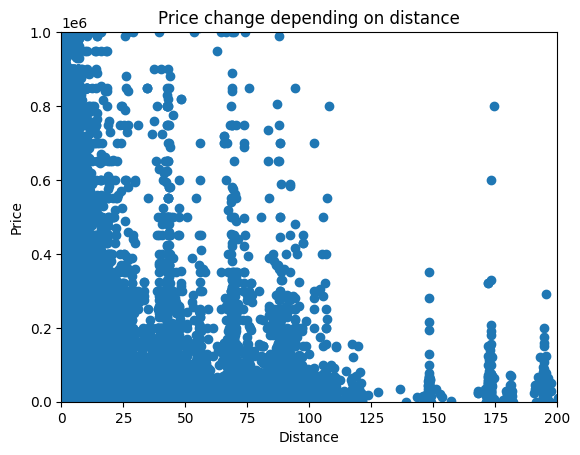

In [45]:
x = df['distance_from_center']
y = df['price']
plt.plot(x, y, 'o')
plt.title('Price change depending on distance')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.xlim(0,200)
plt.ylim(0,1000000)
plt.show()